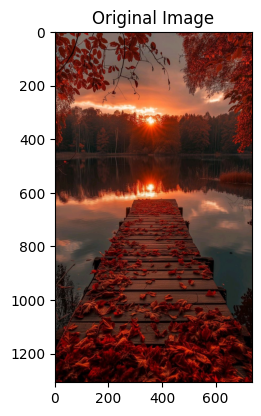

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.show()

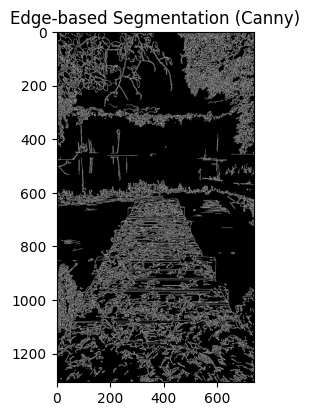

In [ ]:
# T1.1 - Edge-based Segmentation (Canny Edge Detection)
edges = cv2.Canny(gray, 50, 150)
plt.figure(figsize=(10, 10))
plt.subplot(222), plt.imshow(edges, cmap='gray'), plt.title('Edge-based Segmentation (Canny)')
plt.show()

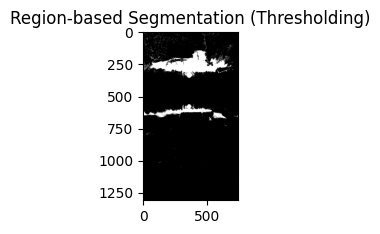

In [ ]:
# T1.2 - Region-based Segmentation (Thresholding)
_, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.subplot(223), plt.imshow(thresholded, cmap='gray'), plt.title('Region-based Segmentation (Thresholding)')
plt.show()

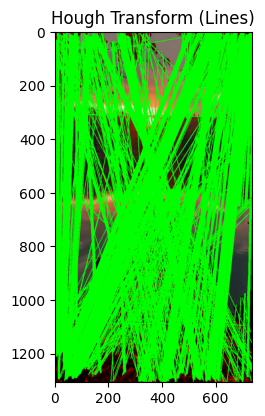

In [ ]:
# T1.3 - Hough Transform for Line Detection
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 68, minLineLength=15, maxLineGap=250)

line_image = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)


plt.figure(figsize=(10, 10))
plt.subplot(224), plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)), plt.title('Hough Transform (Lines)')
plt.show()

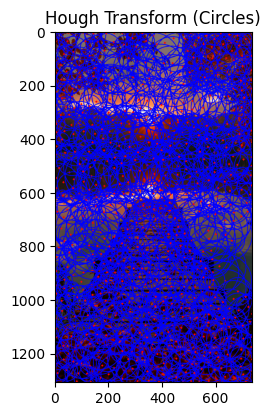

In [ ]:
# Hough Transform for Circle Detection
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=10, maxRadius=100)

circle_image = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        cv2.circle(circle_image, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)
        cv2.circle(circle_image, (circle[0], circle[1]), 2, (0, 0, 255), 3)

plt.figure(figsize=(10, 10))
plt.subplot(224), plt.imshow(cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB)), plt.title('Hough Transform (Circles)')
plt.show()


In [ ]:
# Step 1: Setup the Environment
! pip install opencv-python
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.3/915.3 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall


0: 640x384 (no detections), 131.8ms
Speed: 5.1ms preprocess, 131.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


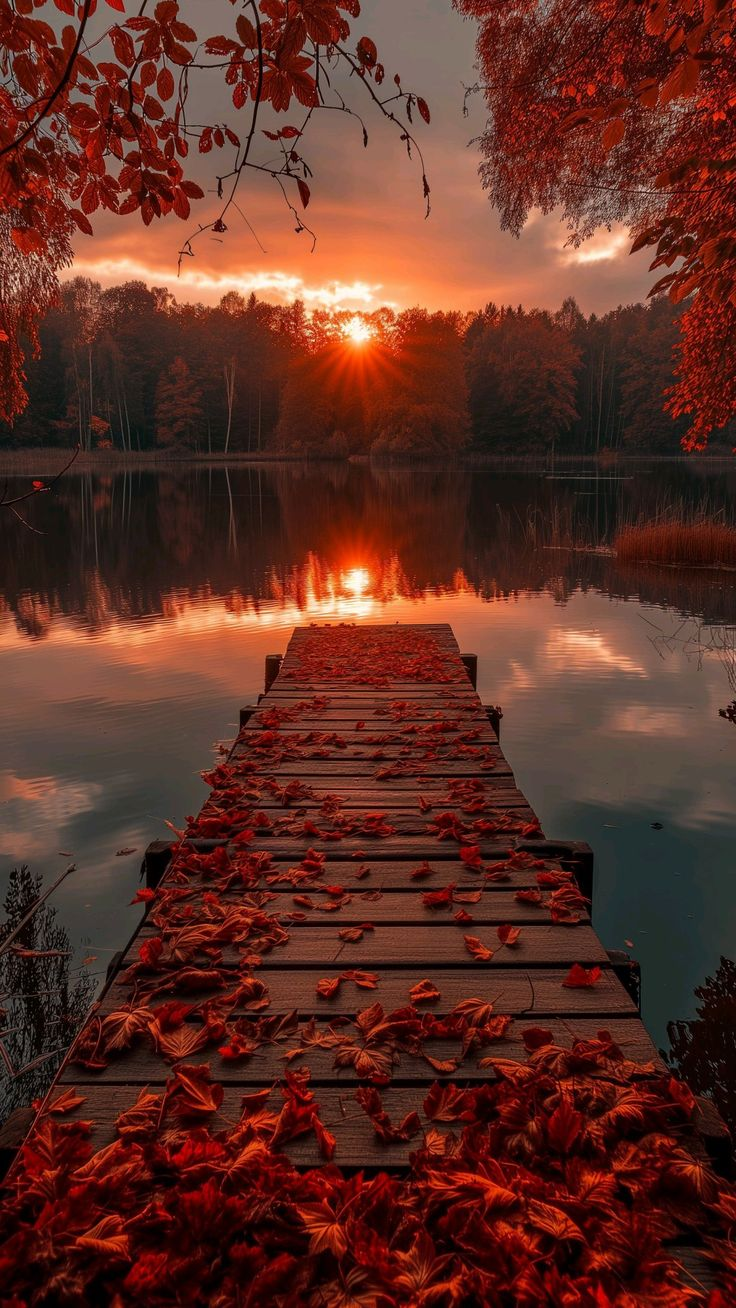

True

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow


# Step 2: Load YOLO model (you can also use a variant like yolov8n.pt, yolov8s.pt, etc.)
model = YOLO('yolov8n.pt')

# Step 3: Load Image
image_path = 'image.jpg'
image = cv2.imread(image_path)

# Step 4: Perform Object Detection
results = model.predict(image)

# Step 5: Visualize the Results
for result in results:
    annotated_image = result.plot()

    # Display the image with bounding boxes
    cv2_imshow( annotated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Optional: Save the annotated image
cv2.imwrite('output_image.jpg', annotated_image)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.8130 - loss: 0.5361 - val_accuracy: 0.8933 - val_loss: 0.3027
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9011 - loss: 0.2749 - val_accuracy: 0.9072 - val_loss: 0.2611
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9178 - loss: 0.2221 - val_accuracy: 0.9072 - val_loss: 0.2585


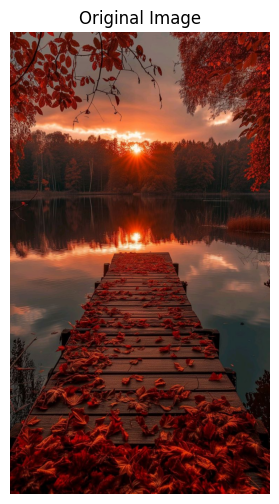

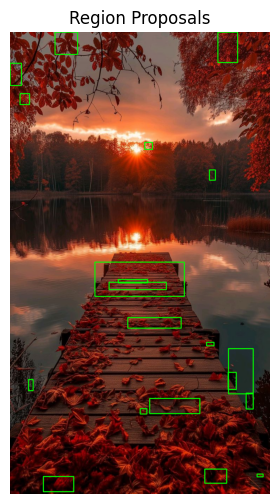

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Region (280, 708, 162, 21) - Predicted Class: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Region (668, 1022, 20, 45) - Predicted Class: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Region (395, 1037, 142, 43) - Predicted Class: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Region (368, 1066, 19, 15) - Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Region (127, 0, 64, 63) - Predicted Class: 8


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load Fashion MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN
model.fit(train_images, train_labels, epochs=3, validation_split=0.1)

# Load any image
image_path = 'image.jpg'  # Change to your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Selective Search for Region Proposals
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
rects = ss.process()

# Displaying region proposals
proposals_image = image.copy()
for (x, y, w, h) in rects[:20]:  # Display only the top 20 proposals
    cv2.rectangle(proposals_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(proposals_image, cv2.COLOR_BGR2RGB))
plt.title("Region Proposals")
plt.axis('off')
plt.show()

# Classifying ROIs
for (x, y, w, h) in rects[:5]:  # Classify top 5 proposals
    roi = cv2.resize(image[y:y+h, x:x+w], (28, 28))
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY) / 255.0
    roi_gray = roi_gray.reshape(1, 28, 28, 1)
    prediction = model.predict(roi_gray)
    predicted_class = np.argmax(prediction)
    print(f"Region ({x}, {y}, {w}, {h}) - Predicted Class: {predicted_class}")
